### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [41]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
#           'Spain': 'yellow',
#           'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'lightblue'
         }

Countries = list(colors.keys())

### Deaths

In [42]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Iran,China,Peru
2021-05-31,331895,3550017,594585,462791,223568,128045,126128,119464,109690,88601,80156,4846,69342
2021-06-01,335102,3565115,595223,465199,227840,128045,126221,119830,109824,88781,80327,4846,69342
2021-06-02,337989,3691664,595833,467706,228146,128057,126283,120217,109841,88945,80488,4846,184942
2021-06-03,340702,3701573,596434,469388,228362,128075,126342,120604,109990,89031,80658,4846,184942
2021-06-04,344082,3712569,597001,470842,228568,128086,126415,120974,110078,89152,80813,4846,185813


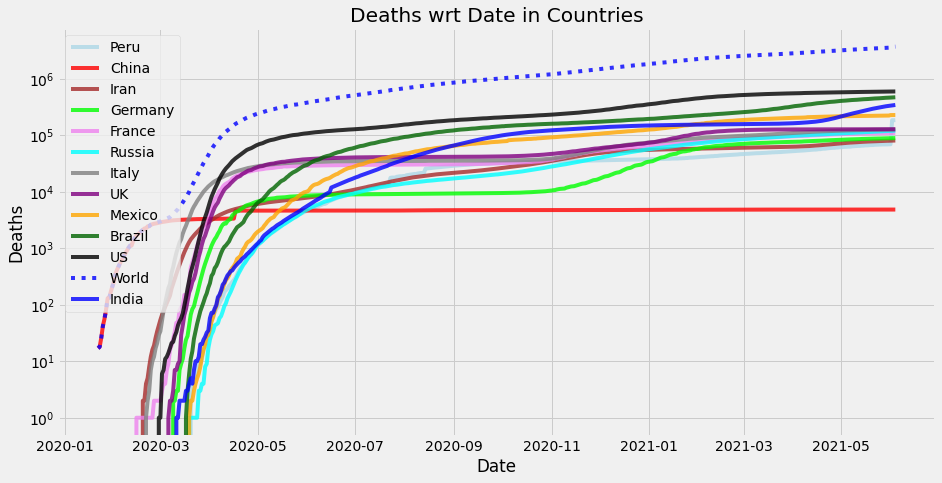

In [43]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [44]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Iran,China,Peru
2021-05-31,127510,378535,5776,30434,932,3294,1818,8341,370,2206,11042,27,7914
2021-06-01,132788,463388,22943,78926,6917,3102,2483,9369,9853,2987,10687,31,0
2021-06-02,134154,493212,16913,95601,3269,4264,2896,8702,1354,5096,11620,24,9963
2021-06-03,132364,489117,19074,83391,2894,5181,1963,8807,15684,3688,9657,25,0
2021-06-04,120529,419717,16860,37936,2809,6144,2556,8820,6958,2993,9209,25,10734


In [45]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Iran,China,Peru
2021-05-31,243865,579149,28179,60555,2344,2585,6025,8609,2189,8374,12573,18,5186
2021-06-01,236460,571431,27830,61780,2648,2619,5789,8660,2700,8015,12447,19,4840
2021-06-02,229639,566217,27102,64034,2690,2729,5596,8662,2610,7821,12392,19,5182
2021-06-03,223154,561077,26567,65325,2703,2892,5354,8672,3482,7545,12209,19,4836
2021-06-04,216312,551653,25919,63499,2710,3109,5167,8682,3713,7242,12009,20,5229


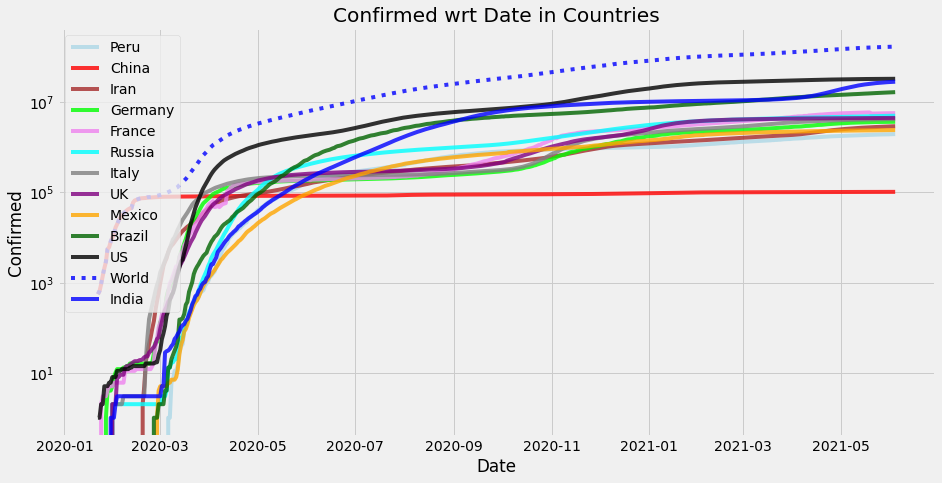

In [46]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [47]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Iran,China,Peru
2021-05-31,2795,8680,142,860,61,2,82,334,128,170,217,0,364
2021-06-01,3207,15098,638,2408,4272,0,93,366,134,180,171,0,0
2021-06-02,2887,126549,610,2507,306,12,62,387,17,164,161,0,115600
2021-06-03,2713,9909,601,1682,216,18,59,387,149,86,170,0,0
2021-06-04,3380,10996,567,1454,206,11,73,370,88,121,155,0,871


### Exponential Weighted Mean

In [48]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Iran,China,Peru
2021-05-31,3633.57,10964.45,514.93,1732.42,218.78,7.55,126.97,367.83,124.56,148.62,216.98,0.0,210.86
2021-06-01,3580.25,11481.14,530.31,1816.87,725.43,6.61,122.72,367.60,125.74,152.54,211.24,0.0,184.50
2021-06-02,3493.60,25864.62,540.27,1903.13,673.01,7.28,115.13,370.03,112.15,153.98,204.96,0.0,14611.44
2021-06-03,3396.02,23870.17,547.87,1875.49,615.88,8.62,108.12,372.15,116.75,145.48,200.59,0.0,12785.01
2021-06-04,3394.02,22260.90,550.26,1822.81,564.64,8.92,103.73,371.88,113.16,142.42,194.89,0.0,11295.76


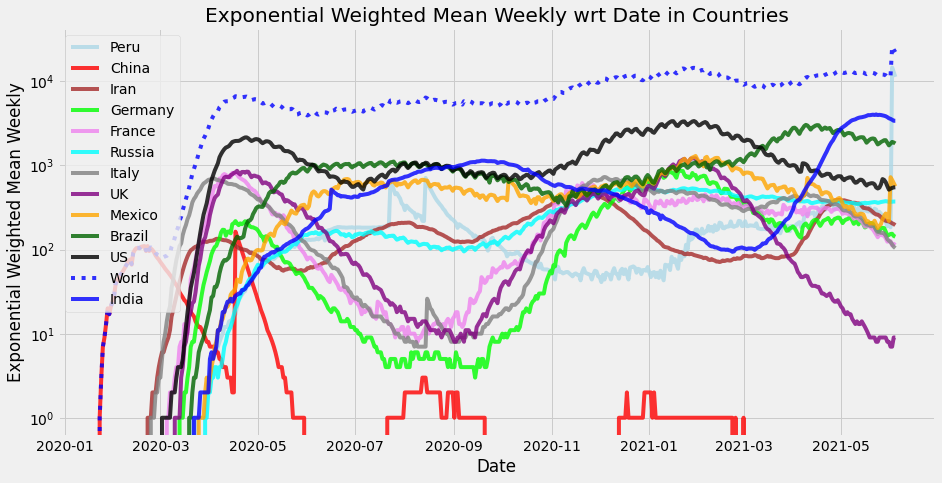

In [49]:
plotter(np.round(AVG), name)

### Stack Plots

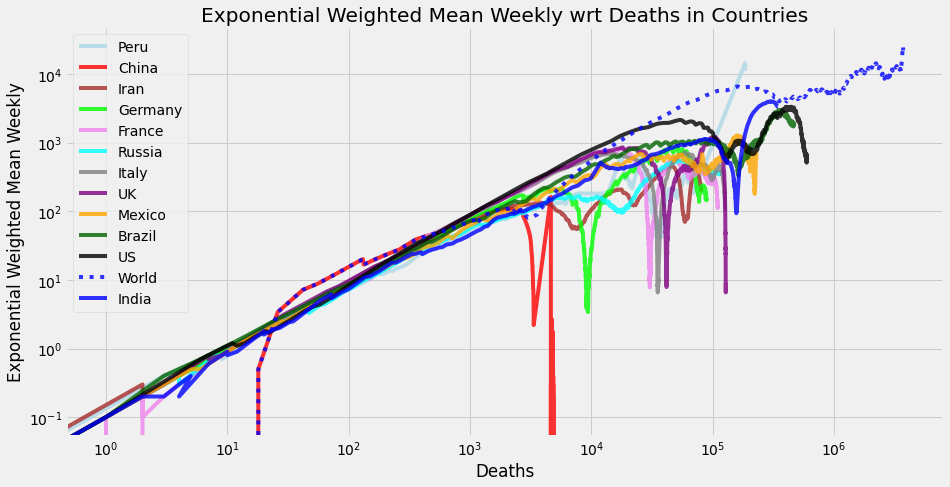

In [50]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

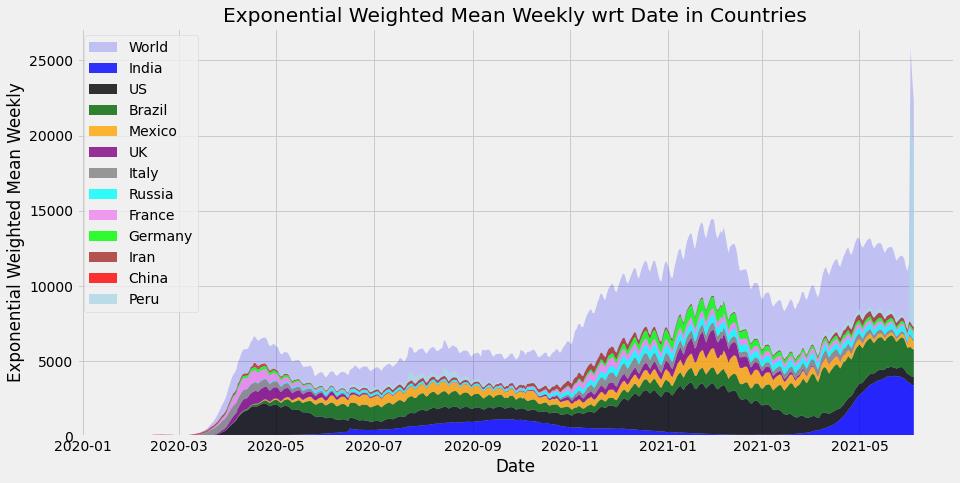

In [51]:
stackplotter(AVG, name)

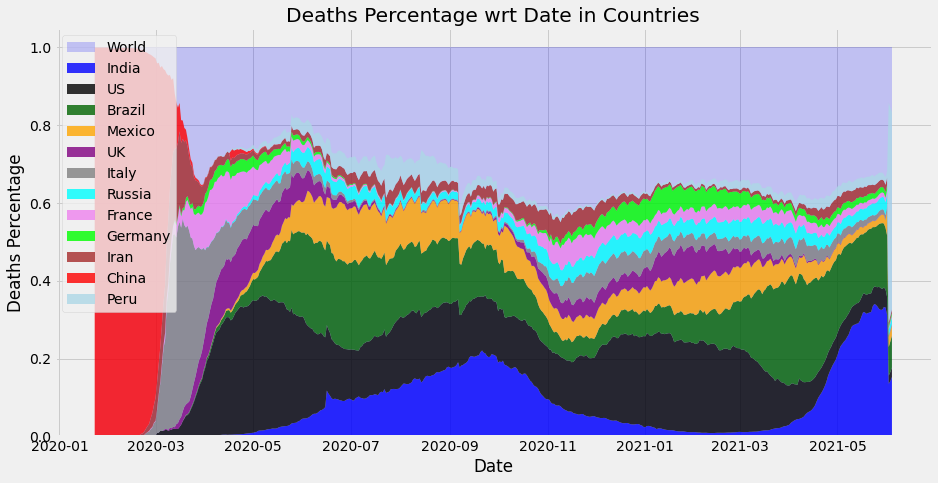

In [52]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [53]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

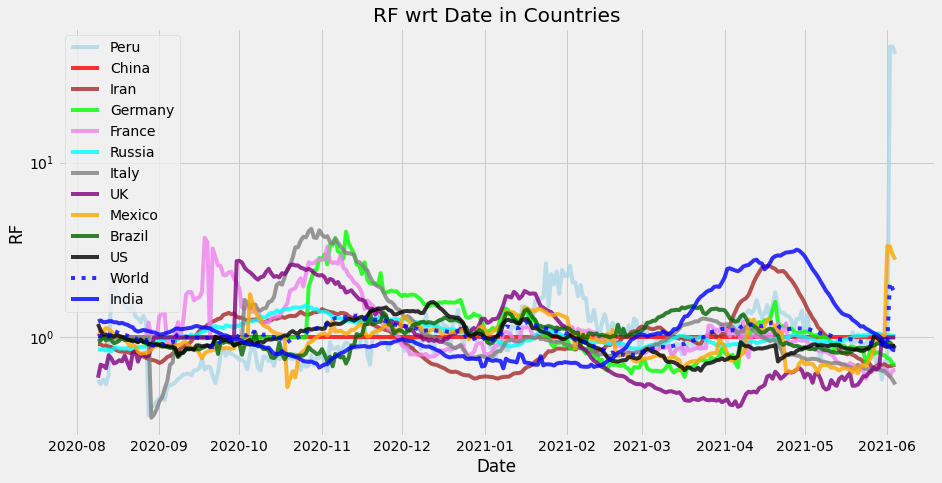

In [54]:
plotter(Reproductivity[200:], 'RF')

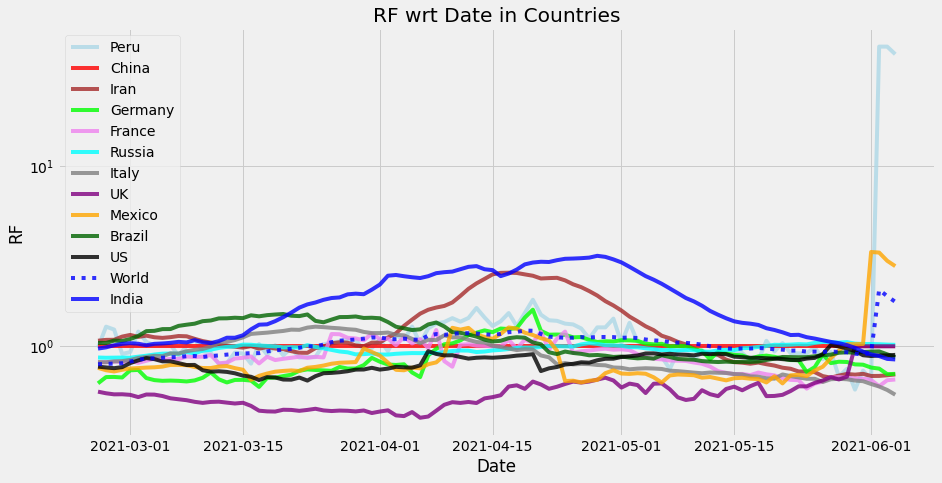

In [55]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [56]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

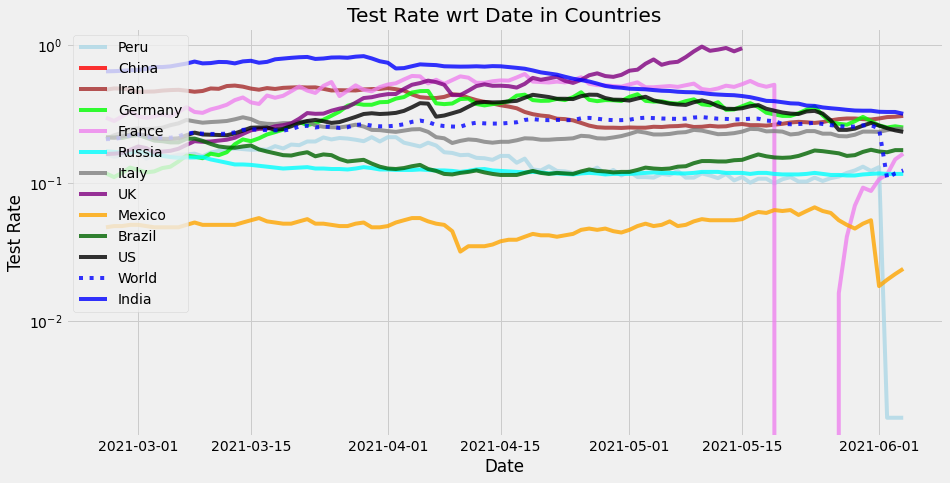

In [57]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [58]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

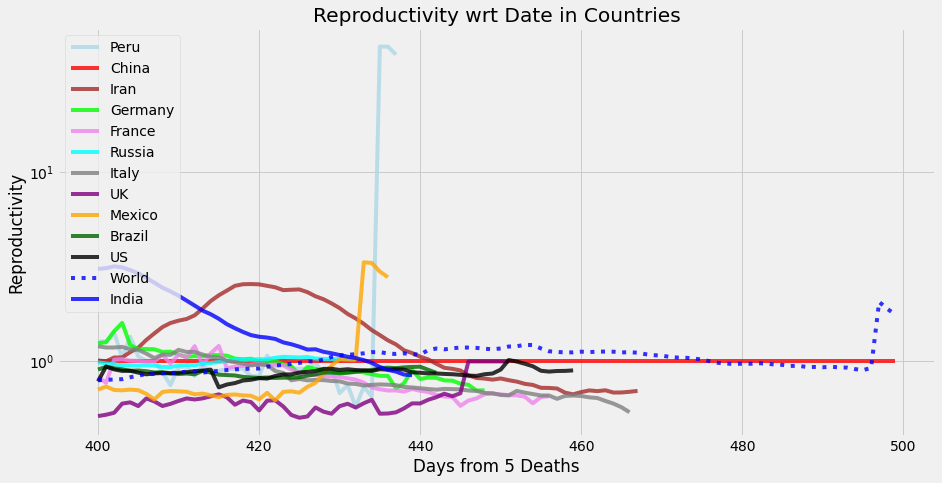

In [59]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

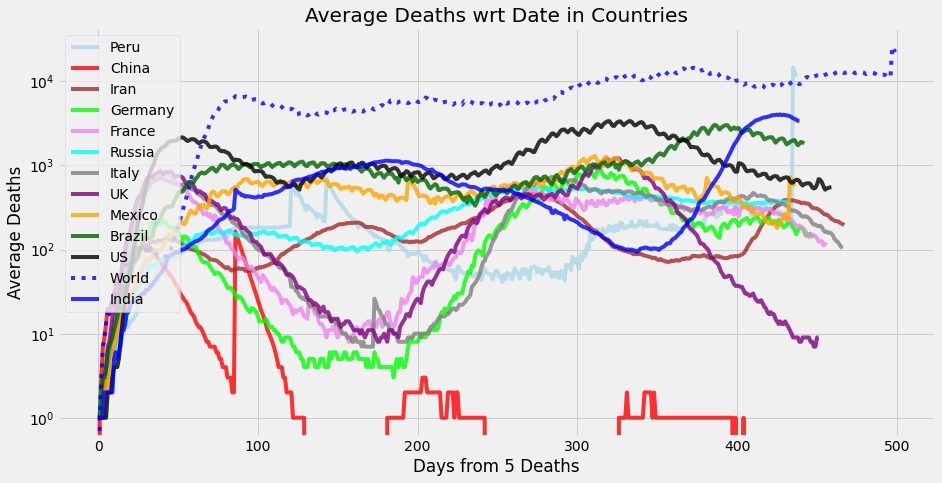

In [60]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

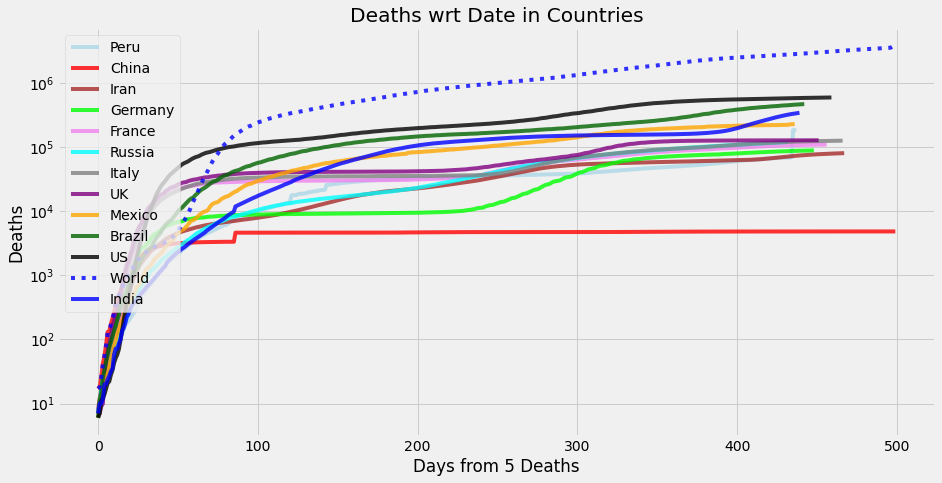

In [61]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [62]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [63]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3712569,10996,27062.71,22260.90,1.7659,172589646,0.124,551653,742.51
US,597001,567,432.14,550.26,0.8963,33343297,0.236,25919,119.40
Brazil,470842,1454,1685.29,1822.81,0.8703,16841408,0.174,63499,94.17
India,344082,3380,3081.43,3394.02,0.8457,28694879,0.319,216312,68.82
Mexico,228568,206,785.14,564.64,2.7848,2429631,0.024,2710,45.71
Peru,185813,871,16713.86,11295.76,41.7218,1976166,0.002,5229,37.16
UK,128086,11,8.00,8.92,1.0000,4521922,NaN,3109,25.62
Italy,126415,73,70.86,103.73,0.5391,4227719,0.249,5167,25.28
Russia,120974,370,369.71,371.88,1.0193,5049210,0.117,8682,24.19


In [64]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3712569,10996,27062.71,22260.90,1.7659,172589646,0.124,551653,742.51
Peru,185813,871,16713.86,11295.76,41.7218,1976166,0.002,5229,37.16
India,344082,3380,3081.43,3394.02,0.8457,28694879,0.319,216312,68.82
Brazil,470842,1454,1685.29,1822.81,0.8703,16841408,0.174,63499,94.17
Mexico,228568,206,785.14,564.64,2.7848,2429631,0.024,2710,45.71
Argentina,80411,538,531.14,523.70,1.0610,3915397,0.276,28909,16.08
Colombia,90890,537,526.14,513.65,1.0662,3518046,0.203,20870,18.18
US,597001,567,432.14,550.26,0.8963,33343297,0.236,25919,119.40
Russia,120974,370,369.71,371.88,1.0193,5049210,0.117,8682,24.19


### Pie Chart

In [65]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3712569


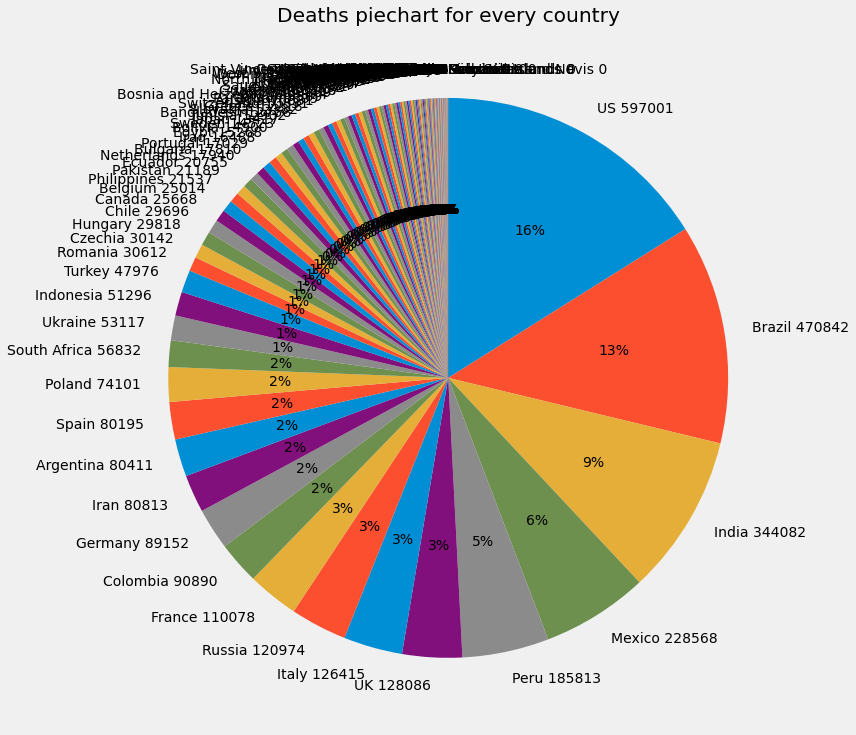

In [66]:
piechart('Deaths')

World total:  27062


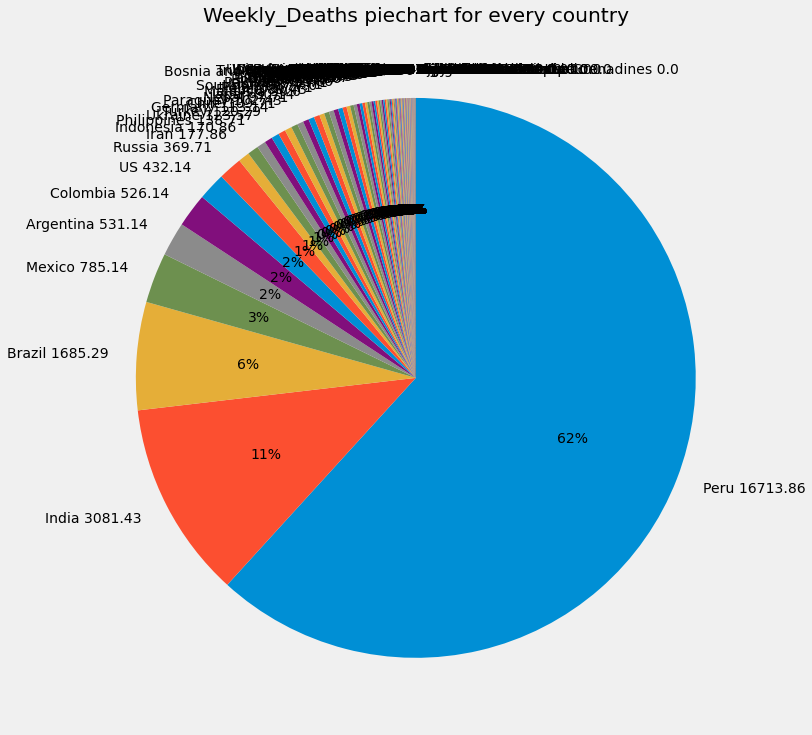

In [67]:
piechart('Weekly_Deaths')

World total:  10996


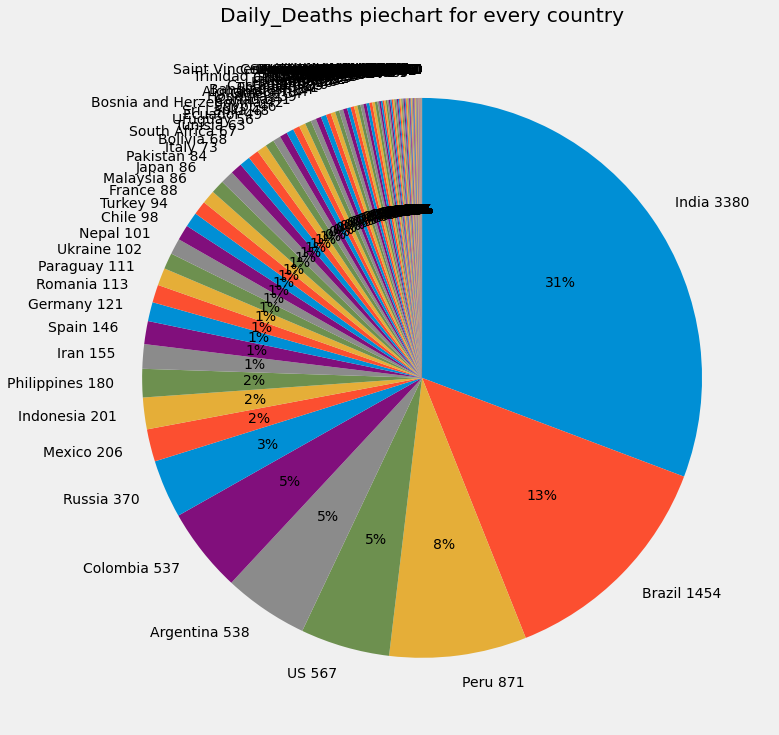

In [68]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-06-05


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

742513800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 524f7bc] `date` update
 1 file changed, 1999 insertions(+), 1999 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (71%)


To https://github.com/Arrowheadahp/COVID-19.git
   776dc73..524f7bc  master -> master


In [70]:
Daily_Deaths['Peru'].tail(12)

2021-05-24         0
2021-05-25       417
2021-05-26       164
2021-05-27       182
2021-05-28         0
2021-05-29       162
2021-05-30         0
2021-05-31       364
2021-06-01         0
2021-06-02    115600
2021-06-03         0
2021-06-04       871
Name: Peru, dtype: int32